In [1]:
import pandas as pd
import sklearn.datasets as d

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as mt
import matplotlib.pyplot as plt

# svm
import sklearn.svm as svm
from sklearn.svm import SVC

# 0. SVM(Support Vector Machine) 이해

In [2]:
# 피처, 레이블 데이터 정의
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

In [3]:
from IPython.display import Image
Image(url='http://hleecaster.com/wp-content/uploads/2020/01/svm05.png')

In [4]:
# SVM Classifier 정의
classifier = SVC(kernel = 'linear')
classifier

SVC(kernel='linear')

In [5]:
# SVC(SVM Classifier) 모델 학습
classifier.fit(training_points, labels) 

SVC(kernel='linear')

In [6]:
# SVC 예측
print(classifier.predict([[3, 2]]))

[1]


In [7]:
# support vector
classifier.support_vectors_

array([[7., 5.],
       [8., 2.],
       [2., 2.]])

# 1. breast_cancer 데이터로 Linear SVM 실습

In [8]:
# breast_cancer 데이터 셋 로드
x = d.load_breast_cancer()

cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

In [9]:
print(cancer.shape)
cancer.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

## Linear SVM 학습

In [13]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
svm_clf =svm.SVC(kernel = 'linear')
svm_clf

SVC(kernel='linear')

In [14]:
# 교차검증
scores = cross_val_score(svm_clf, x.data, x.target, cv = 5)

In [15]:
print(scores)
print('교차검증 평균: ', np.mean(scores))

[0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
교차검증 평균:  0.9455364073901569


## SVM, kernel = 'rbf'로 비선형분리 진행

In [16]:
svm_clf = svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, x.data, x.target, cv = 5)

In [17]:
print(scores)
print('교차검증 평균: ', np.mean(scores))

[0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
교차검증 평균:  0.9121720229777983


## 스케일링 적용 후 Linear SVM 

In [18]:
X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [19]:
# StandarScaler 적용
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [20]:
# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)

In [21]:
# SVM, kernel = 'linear'로 선형분리 진행 
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 변환된 X로 교차검증
scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
print(scores)
print('교차검증 평균: ', np.mean(scores))

[0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
교차검증 평균:  0.9701443875174661


## 하이퍼 파라미터 튜닝(그리드 서치)

## Linear SVM 하이퍼 파라미터 튜닝

In [22]:
# Linear SVM 하이퍼 파라미터 C값 정의
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

In [23]:
# Linear SVM 분류기 정의
svm_clf = svm.SVC(kernel = 'linear',random_state=100)

In [24]:
# 그리드 서치 적용
grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5, scoring='accuracy')

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]},
             scoring='accuracy')

In [25]:
result_raw = pd.DataFrame(grid_svm.cv_results_)
result_raw

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003194,0.000243,0.000882,0.000038,0.001,{'C': 0.001},0.9500,0.9500,0.9875,0.911392,0.936709,0.947120,0.024625,8
1,0.002242,0.000145,0.000690,0.000070,0.01,{'C': 0.01},0.9750,0.9750,0.9875,0.949367,0.962025,0.969778,0.013002,2
2,0.001946,0.000214,0.000566,0.000031,0.1,{'C': 0.1},0.9500,0.9875,1.0000,0.962025,0.949367,0.969778,0.020471,2
3,0.002755,0.000404,0.000734,0.000178,1,{'C': 1},0.9625,0.9750,0.9875,0.987342,0.962025,0.974873,0.011252,1
4,0.002572,0.000083,0.000503,0.000051,10,{'C': 10},0.9250,0.9750,0.9625,0.974684,0.949367,0.957310,0.018702,4
5,0.003054,0.000587,0.000404,0.000025,25,{'C': 25},0.9375,0.9750,0.9625,0.974684,0.936709,0.957278,0.017080,5
6,0.003167,0.001058,0.000373,0.000004,50,{'C': 50},0.9375,0.9750,0.9625,0.974684,0.936709,0.957278,0.017080,5
7,0.003159,0.001061,0.000374,0.000004,100,{'C': 100},0.9375,0.9750,0.9625,0.974684,0.936709,0.957278,0.017080,5


In [26]:
result = result_raw[['param_C', 'mean_test_score', 'rank_test_score']]
result.sort_values('rank_test_score')

,param_C,mean_test_score,rank_test_score
3,1,0.974873,1
1,0.01,0.969778,2
2,0.1,0.969778,2
4,10,0.957310,4
5,25,0.957278,5
6,50,0.957278,5
7,100,0.957278,5
0,0.001,0.947120,8


# 2. SVM 비선형 분리 학습

In [27]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import sklearn.datasets as d

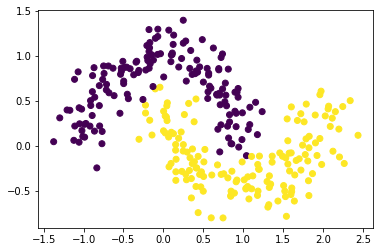

In [28]:
# 비선형 데이터 생성
X, y = d.make_moons(n_samples = 300, noise = 0.16, random_state = 42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [29]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size = 0.3, random_state = 100)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 2)
(90, 2)
(210,)
(90,)


## Linear SVM과 kernel SVM 성능 비교

In [31]:
# SVM, kernel = 'linear'로 선형분리 진행
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)

print(scores)
print('교차 검증 평균:', np.mean(scores))

[0.86666667 0.88333333 0.88333333 0.83333333 0.83333333]
교차 검증 평균: 0.86


In [32]:
# SVM, kernel = 'rbf'로 비선형분리 진행 
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)

print(scores)
print('교차 검증 평균:', np.mean(scores))

[0.98333333 0.96666667 0.98333333 0.95       0.96666667]
교차 검증 평균: 0.97


## 그리드서치로 RBF SVM 하이퍼 파라미터 튜닝

In [33]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

In [34]:
# 비선형 SVC 모델 정의
svm_clf = svm.SVC(kernel = 'rbf',random_state=100)

In [35]:
# 그리드서치 학습
grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]},
             scoring='accuracy')

In [36]:
result_raw = pd.DataFrame(grid_svm.cv_results_)
result_raw.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002293,0.000148,0.001170,0.000029,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.5,0.52381,0.52381,0.52381,0.52381,0.519048,0.009524,44
1,0.002295,0.000239,0.001198,0.000051,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.5,0.52381,0.52381,0.52381,0.52381,0.519048,0.009524,44
2,0.002206,0.000073,0.001211,0.000137,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.5,0.52381,0.52381,0.52381,0.52381,0.519048,0.009524,44


In [37]:
result = result_raw[['param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']]
result.sort_values('rank_test_score').head(10)

,param_C,param_gamma,mean_test_score,rank_test_score
20,0.1,10,0.980952,1
27,1,1,0.976190,2
35,10,1,0.976190,2
28,1,10,0.971429,4
43,25,1,0.966667,5
46,25,50,0.966667,6
51,50,1,0.966667,6
37,10,25,0.966667,6
38,10,50,0.966667,6
62,100,50,0.966667,6
